In [1]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import warnings
from data_visualisation_methods import *
sns.set_theme(style="darkgrid", palette="pastel")
sns.color_palette("Set2")
warnings.filterwarnings("ignore")

df = pd.read_csv("data.csv") 
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


Columns like *experinece*, *last_new_job* and *company_size* might require transformations like deleting the '>' symbol form the *last_new_job* column and others.

In [2]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
df.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

# EDA

## Data Distribution

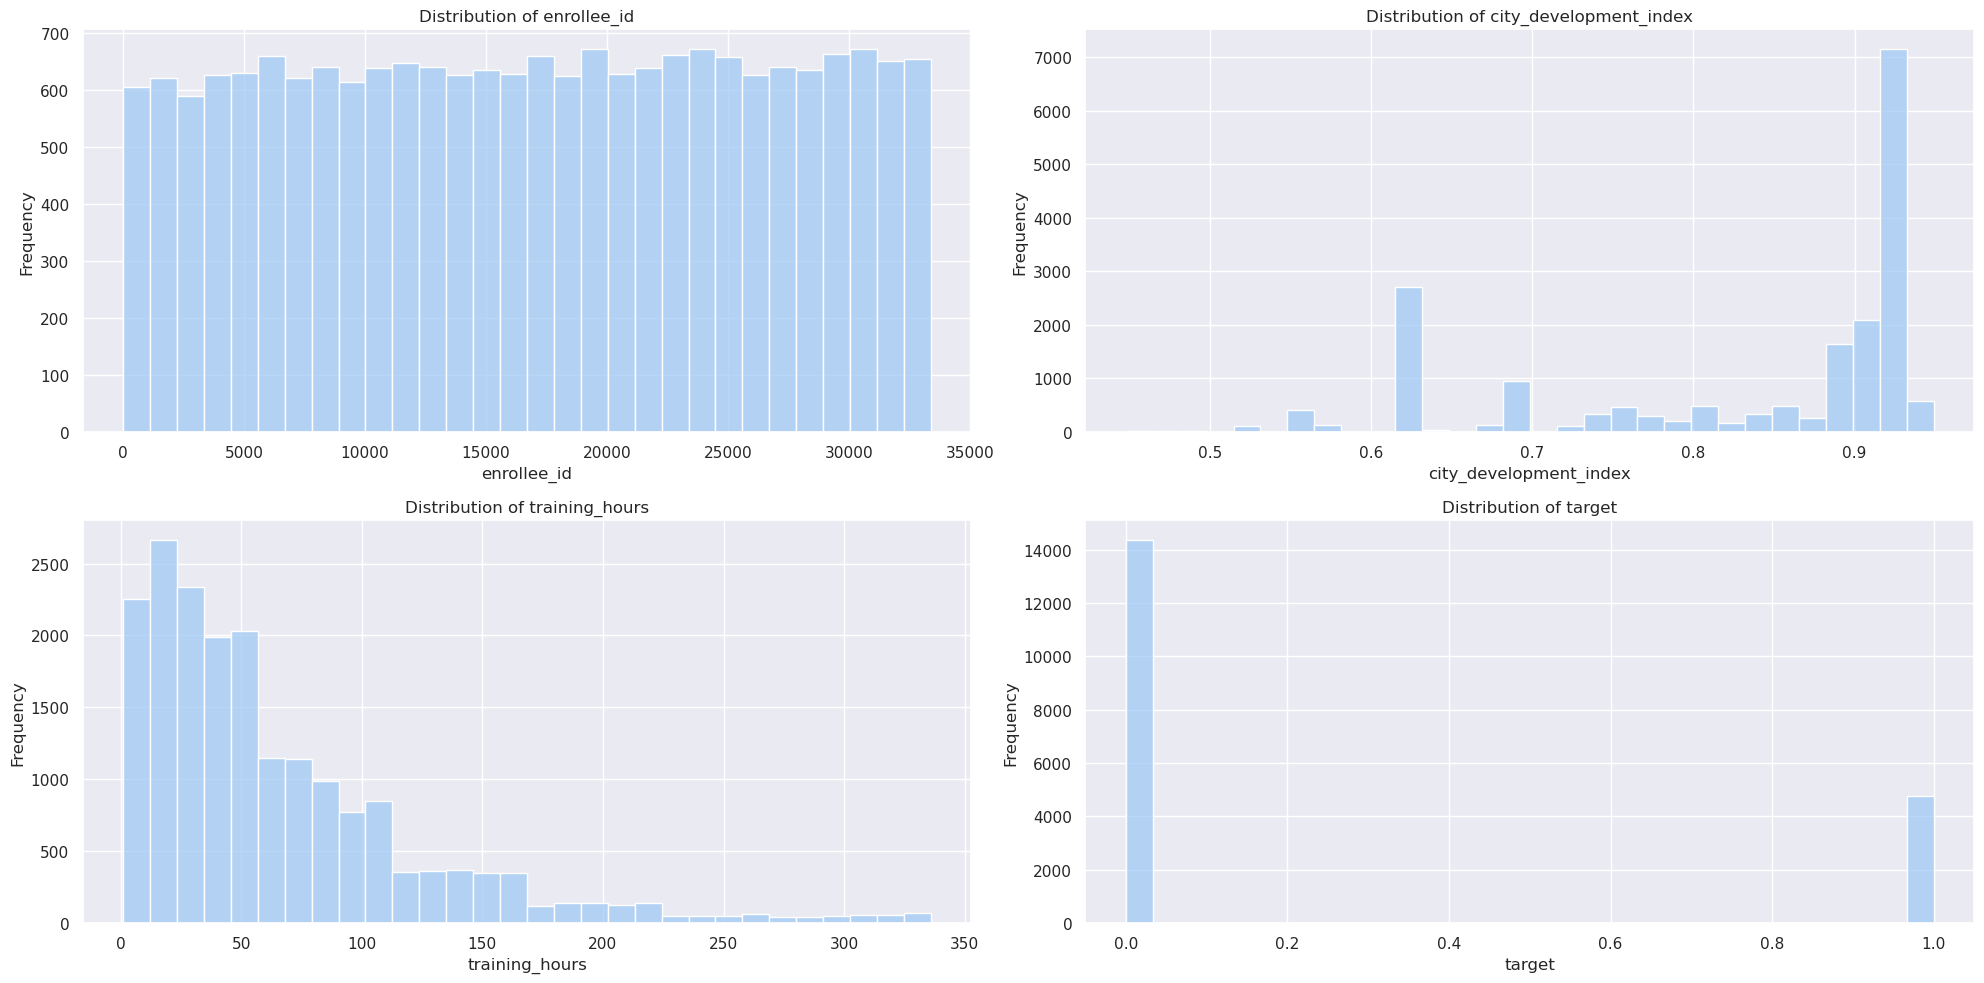

In [5]:
plot_numerical_columns_distribution(df, 2, 2)

The *training_hours* and *city_development_index* are skewed, thus we might need some data normalization in the future. 

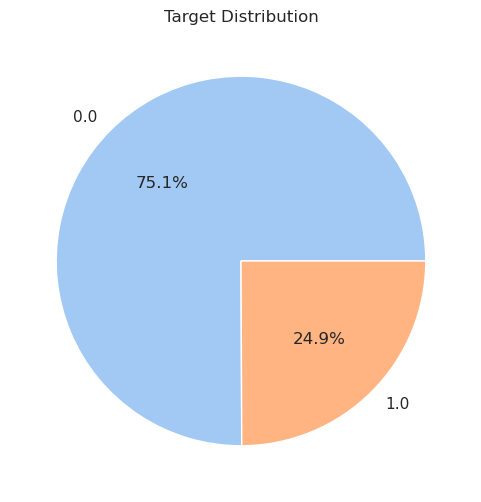

In [6]:
data=df['target'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(data ,labels=data.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

The *target* column distribution is not as good as expected, thus in the future we will use techniques like undersampling or oversampling depending on the situation.

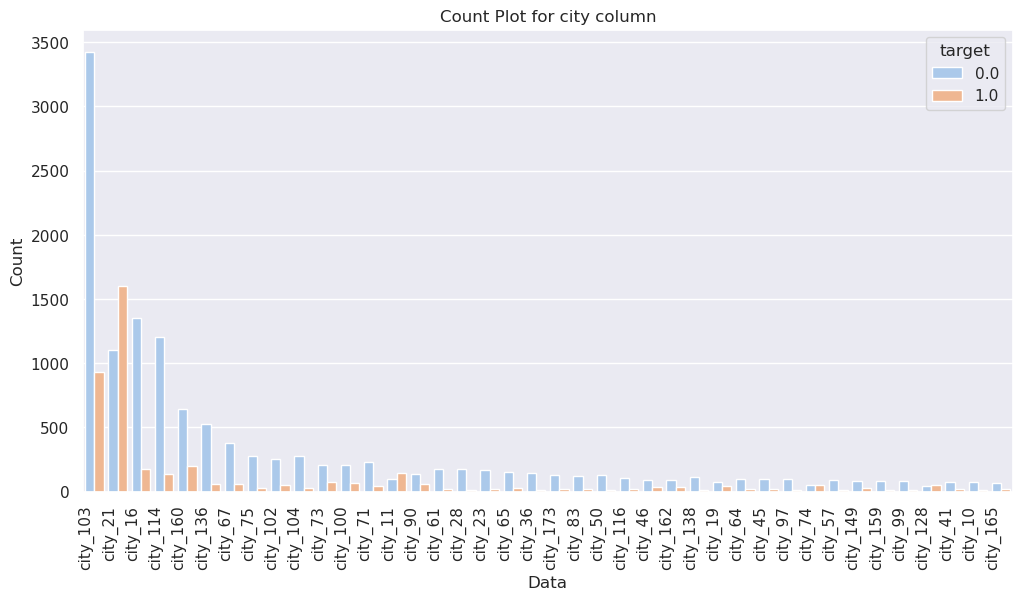

In [7]:
target_countplot(df,'city','target')

Speaking about cities and city index, we see that the most people that are applying to this job are coming from city_103 and city_21. These cities have a high development index, thus their citizens might have more resources and priviledges. This column could be deleted, because it is in high correlation with *city_development_index*, thus there is no need for it.

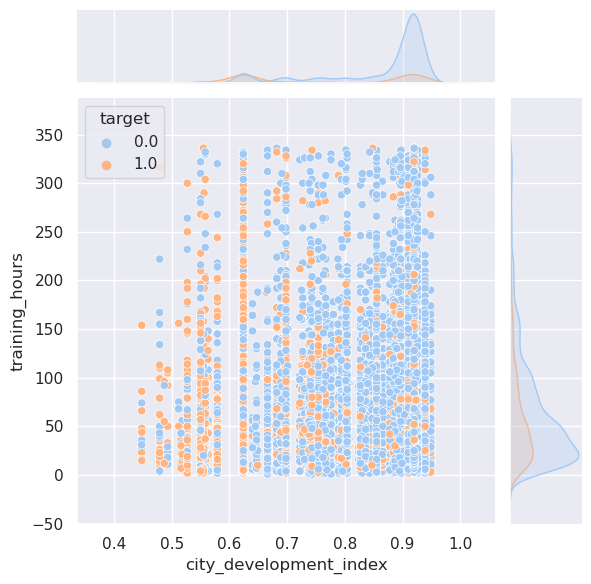

In [8]:
sns.jointplot(x='city_development_index',y='training_hours',data=df,hue='target');

People that are coming from cities with high development index, are inclined to have a higher number of training hours. Also, it can be seen that even if number of training hours is small, and people are coming from less wealthy cities, they have a higher chance to get the job.

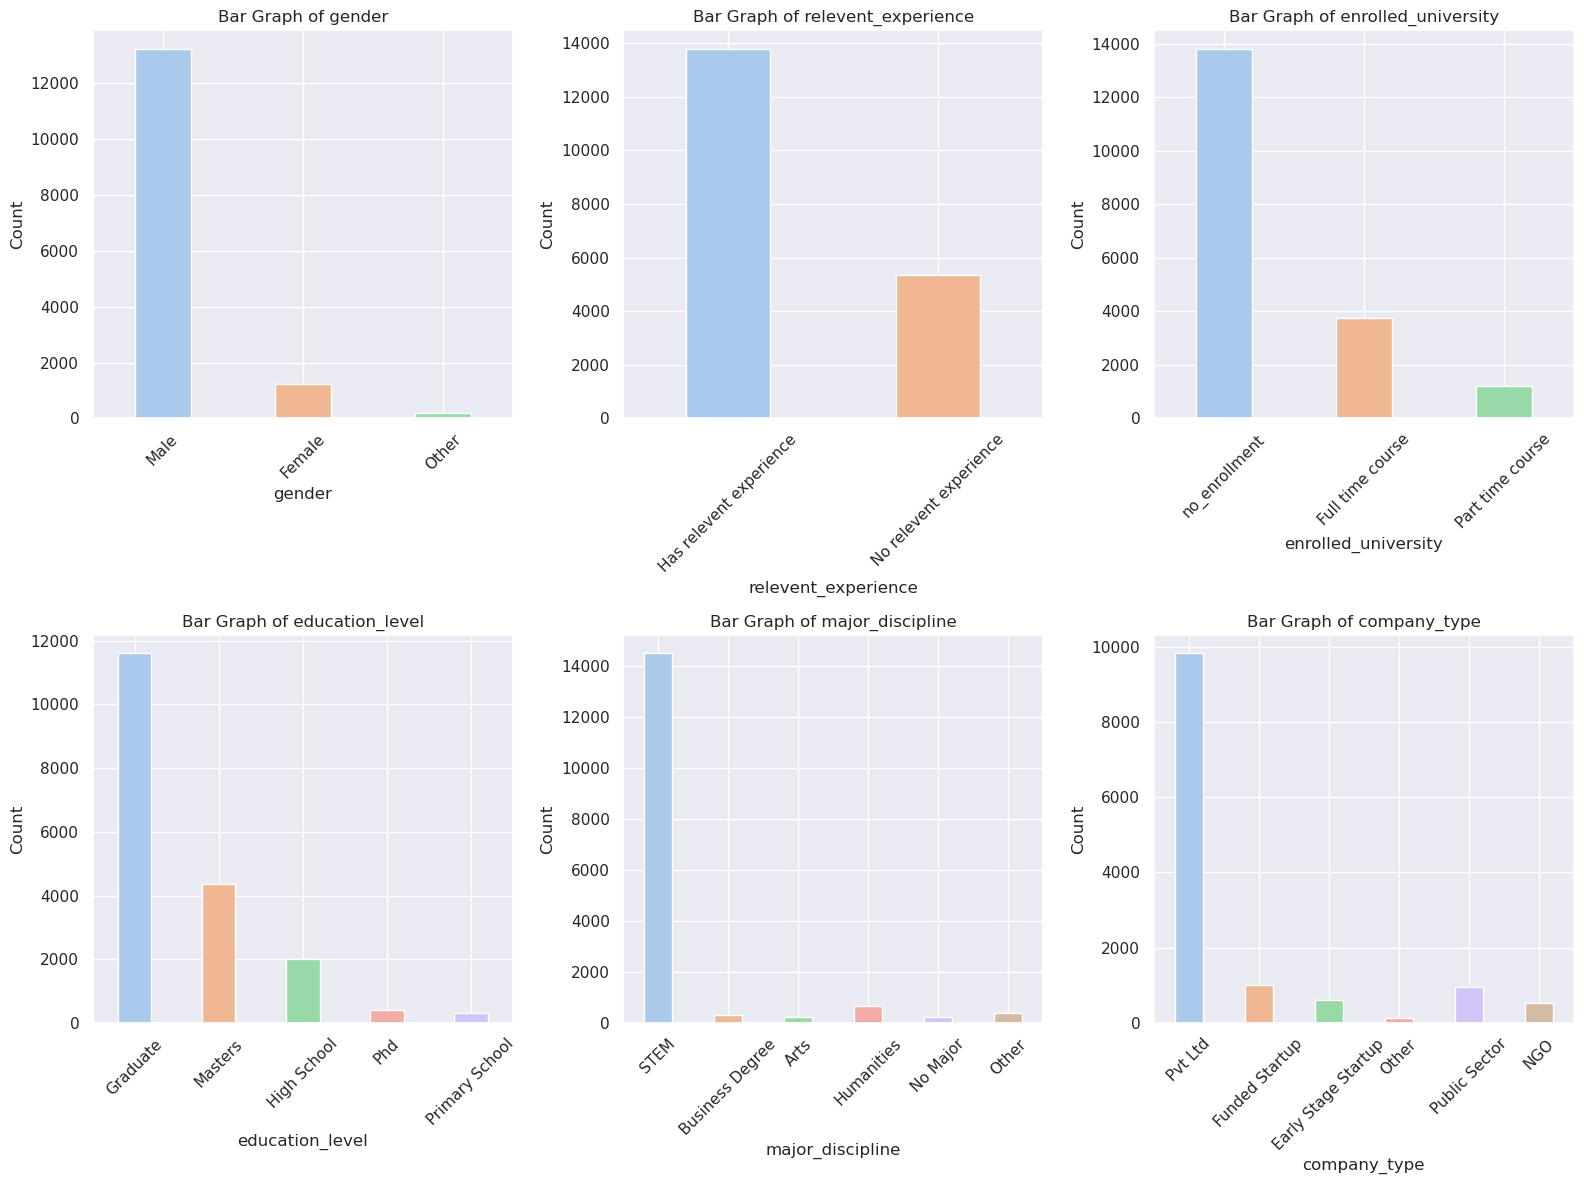

In [9]:
plot_categorical_columns(df[['gender',
                             'relevent_experience',
                             'enrolled_university',
                             'education_level',
                             'major_discipline',
                             'company_type']],3,2)

The object type columns have a skewed distribution, however not all columns have equal importance.The *company_type*  is not so important, due to distribution. For the machine, it would seem that *Pvt Ltd* company type is much more important than the other types, however it's not. The *Gender* column is not well distributed due to the lack of data, however it seems accurate if we compare the distribution with real data that's why it is important.

## Outlier Analysis

In [10]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for k, v in df[numerical_columns].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column enrollee_id outliers = 0.00%
Column city_development_index outliers = 0.09%
Column training_hours outliers = 5.14%
Column target outliers = 100.00%


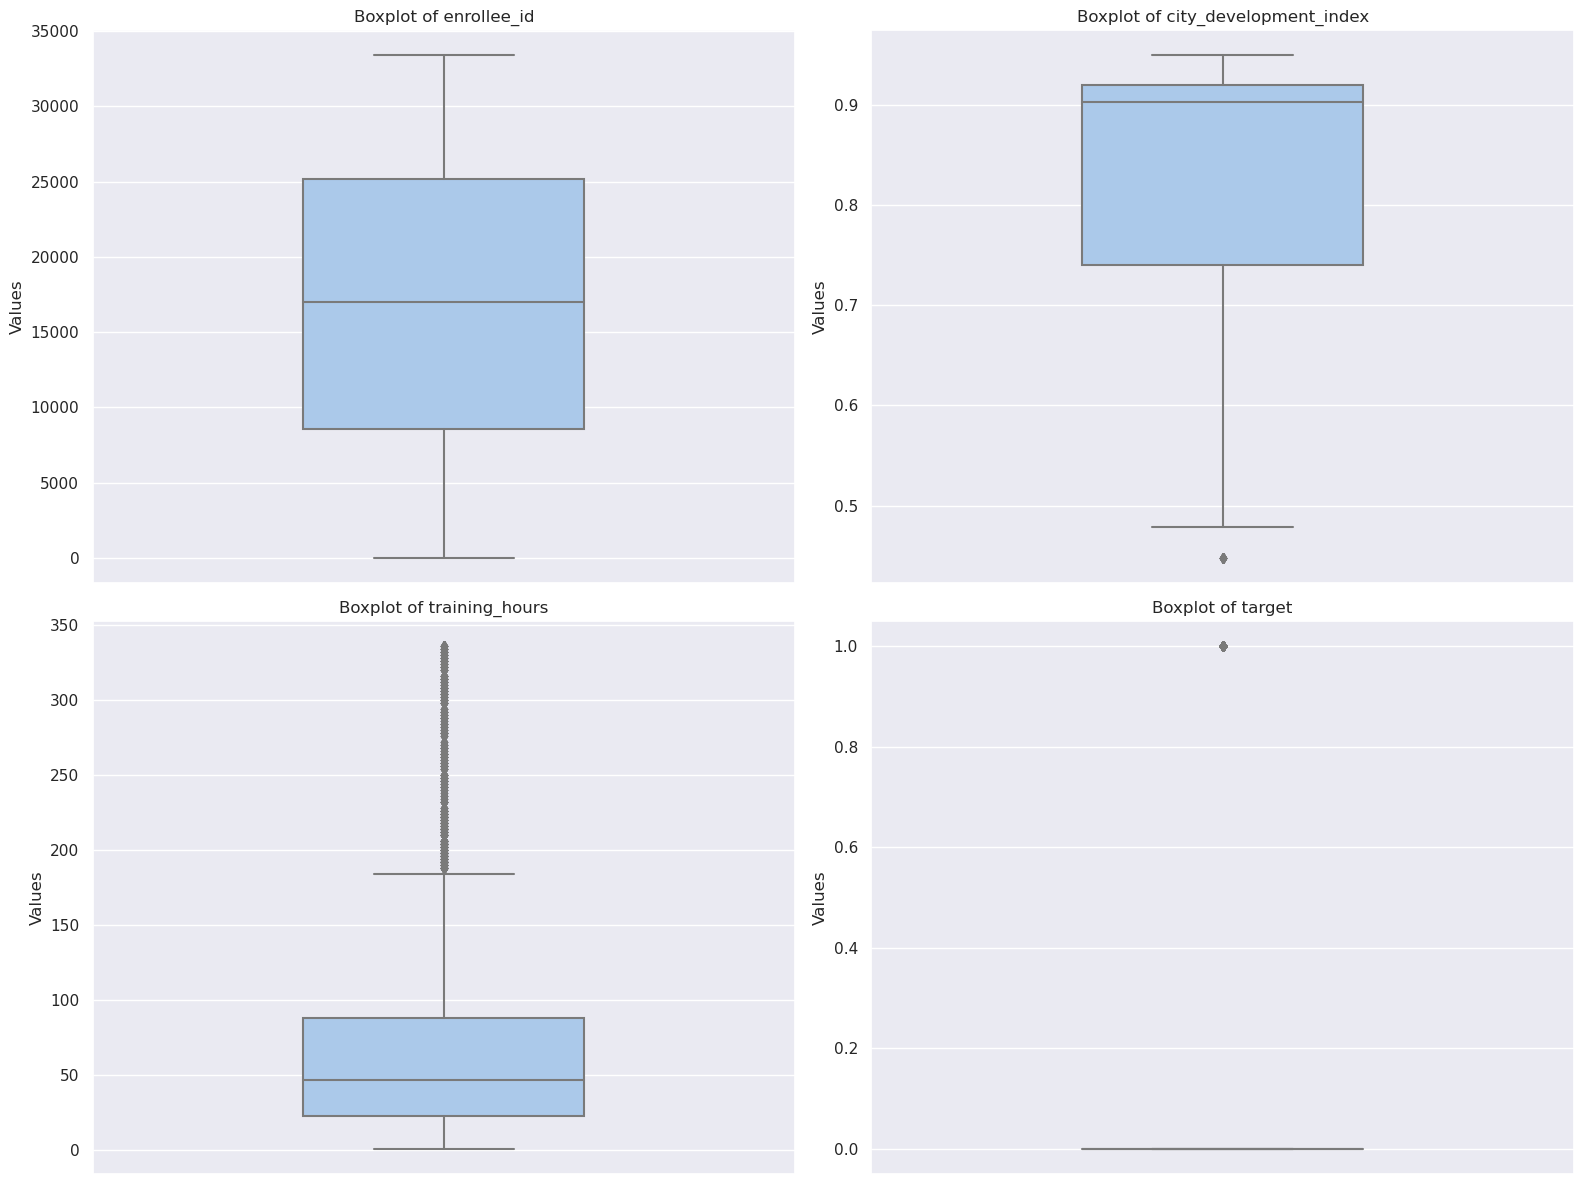

In [11]:
plot_outliers_boxplot(df)

The column that has the most outliers is *training_hours*.

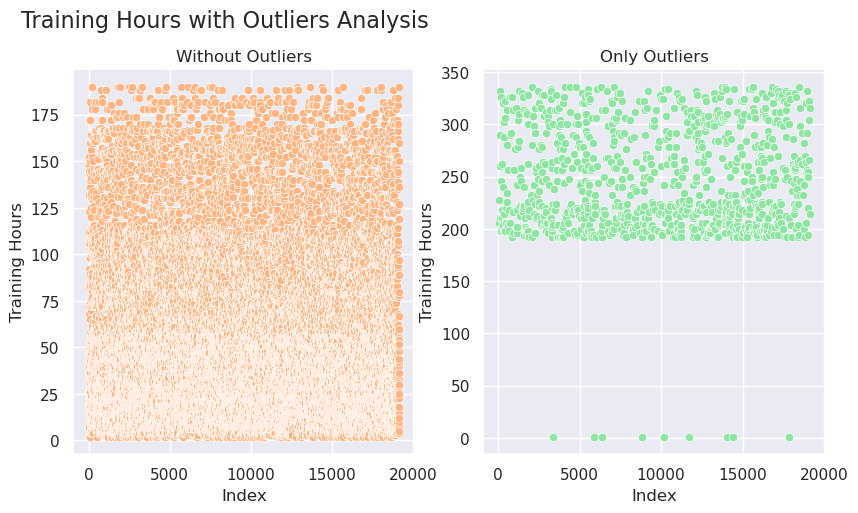

In [12]:
from sklearn.ensemble import IsolationForest
X = df[['training_hours']]
model = IsolationForest(contamination=0.05)  
model.fit(X)
df['is_outlier'] = model.predict(X)
df['is_outlier'] = df['is_outlier'].astype('category')

colors = sns.color_palette("pastel")
plt.subplot(1, 3, 2)
sns.scatterplot(x=df[df['is_outlier'] == 1].index, y=df[df['is_outlier'] == 1]['training_hours'], color=colors[1])
plt.title('Without Outliers')
plt.xlabel('Index')
plt.ylabel('Training Hours')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df[df['is_outlier'] == -1].index, y=df[df['is_outlier'] == -1]['training_hours'], color=colors[2])
plt.title('Only Outliers')
plt.xlabel('Index')
plt.ylabel('Training Hours')

plt.gcf().set_size_inches(15, 5)

plt.suptitle('Training Hours with Outliers Analysis', fontsize=16, y=1)
plt.show()

The outliers for this column seem viable and workable with, for there is no need to process them.

## Missing Values Analysis

<Axes: >

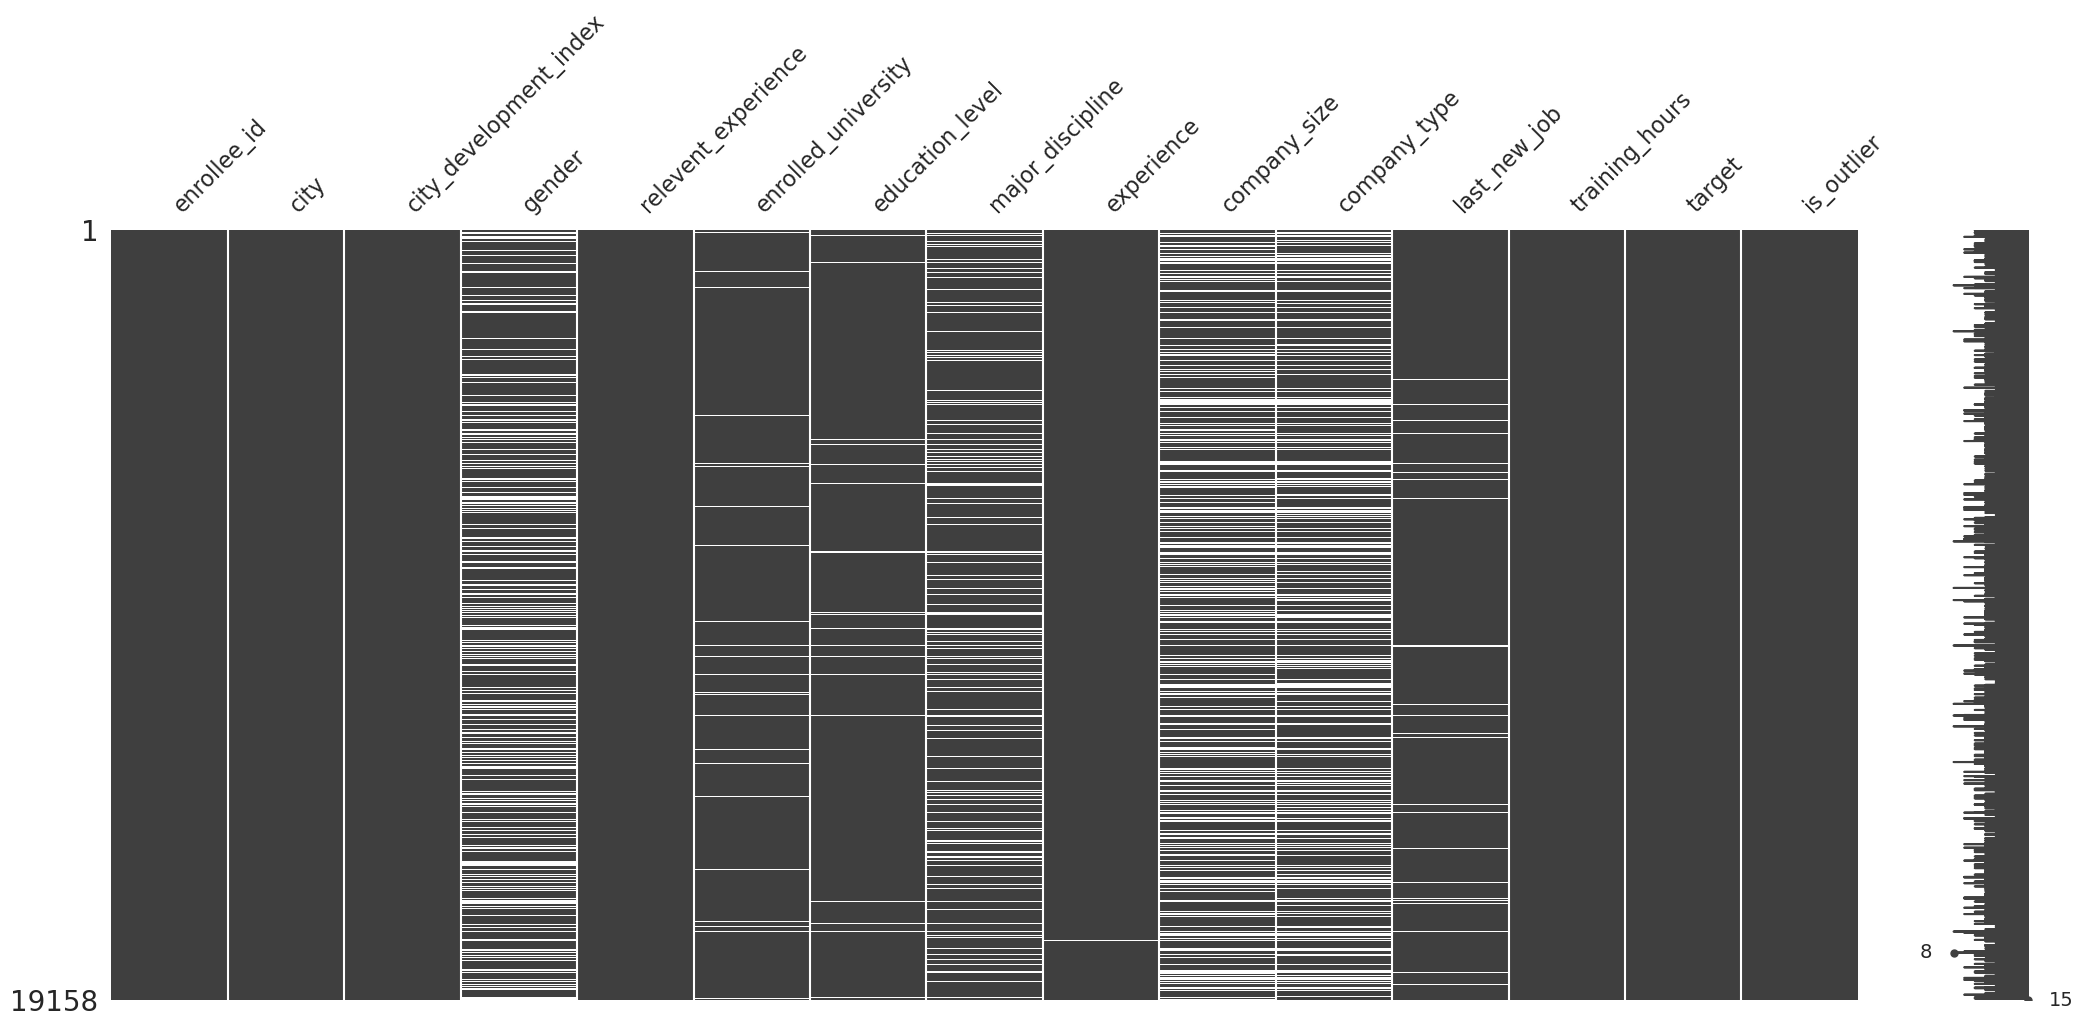

In [13]:
import seaborn as sns
import pandas as pd
import missingno as msno
%matplotlib inline
msno.matrix(df)

<Axes: >

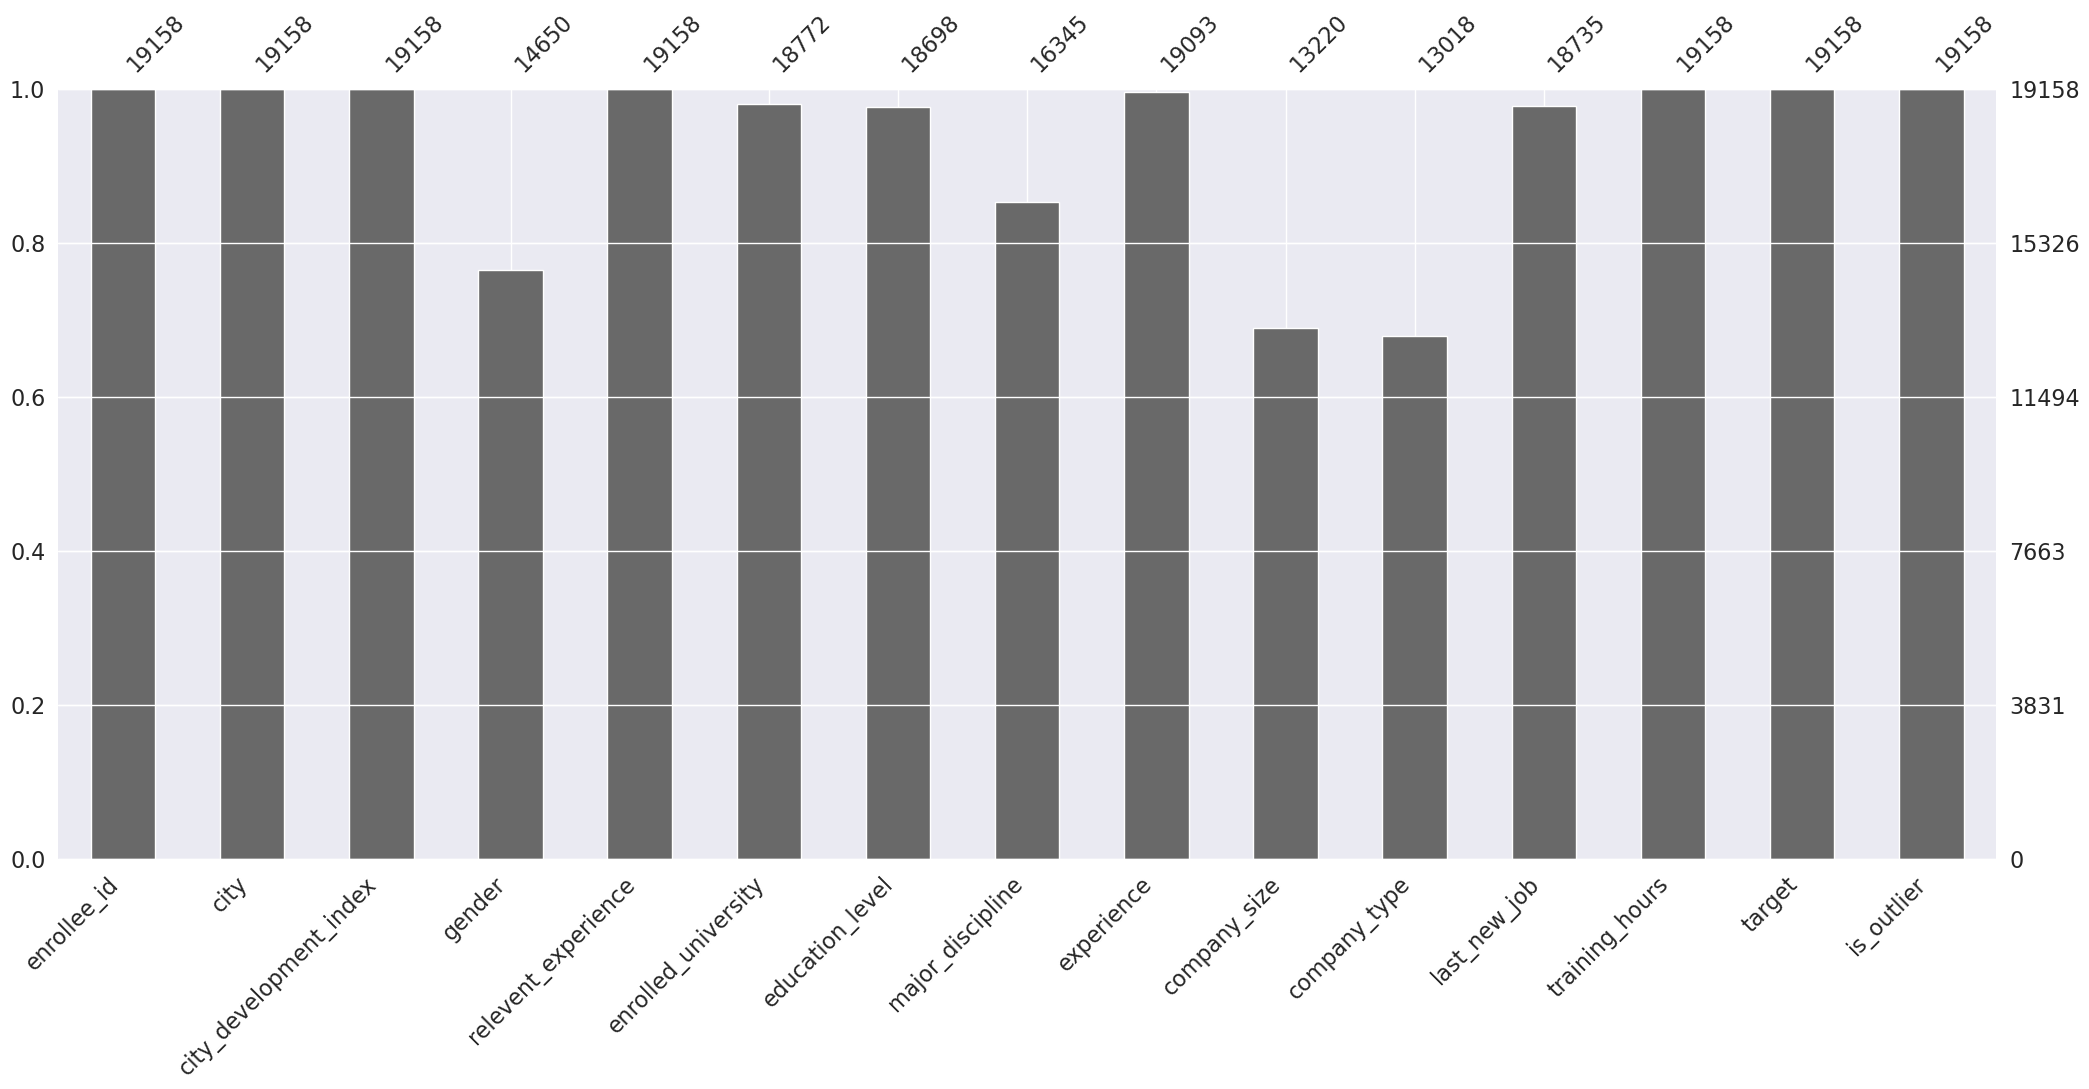

In [14]:
msno.bar(df)

Columns like *gender*, *major_discipline* and *company_type* have the most missing values. It could be risky to deal with them using data imputing, that's why, a good thing would be to see the corralation and do feature selection, and after that if there is not need for them, to delete them.

# Data Preprocessing

In [15]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [16]:
df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [17]:
def convert_thresholds(x):
    if x is None:
        return None

    if isinstance(x, int):
        return x

    if isinstance(x, float):
        if math.isnan(x):
            return None
        return int(x)

    if isinstance(x, str):
        if x == 'never':
            x = 0
        elif '>' in x:
            x = int(x.split('>')[-1]) + 1
        elif '<' in x:
            x = int(x.split('<')[-1]) - 0.5
        else:
            x = int(x.strip())

    return x

df['experience'] = df['experience'].map(convert_thresholds)
df['last_new_job'] = df['last_new_job'].map(convert_thresholds)

print(df['experience'].unique())
print(df['last_new_job'].unique())

[21.  15.   5.   0.5 11.  13.   7.  17.   2.  16.   1.   4.  10.  14.
 18.  19.  12.   3.   6.   9.   8.  20.   nan]
[ 1.  5.  0.  4.  3.  2. nan]


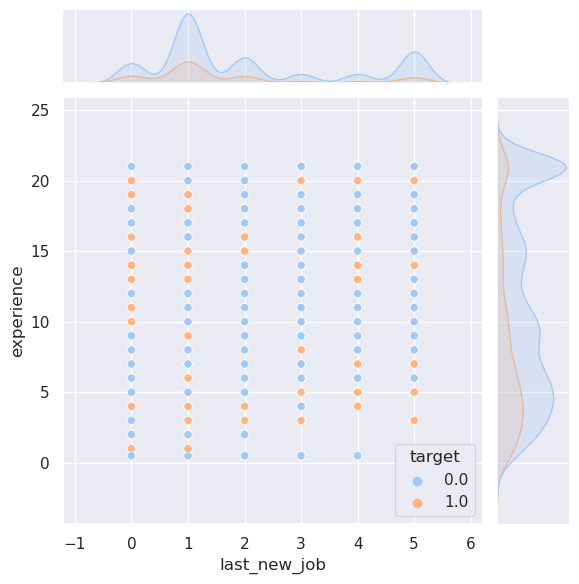

In [18]:
sns.jointplot(x='last_new_job',y='experience',data=df,hue='target');

In [19]:
df['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

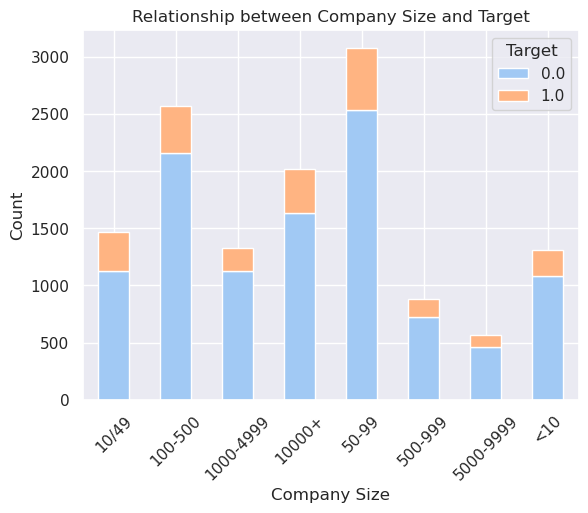

In [20]:
crosstab = pd.crosstab(df['company_size'], df['target'])

crosstab.plot(kind='bar', stacked=True)
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.title('Relationship between Company Size and Target')
plt.legend(title='Target')
plt.xticks(rotation=45)
plt.show()

In [21]:
company_size = {
    '<10'       : 0,
    '10/49'     : 1,
    '50-99'     : 2,
    '100-500'   : 3,
    '500-999'   : 4,
    '1000-4999' : 5,
    '5000-9999' : 6,
    '10000+'    : 7
}

df['company_size'] = df.company_size.map(lambda x: company_size.get(x, None))

In [22]:
df.drop(columns=['enrollee_id', 'city','is_outlier'], inplace=True)
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,2.0,Pvt Ltd,5.0,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.5,NaN,Pvt Ltd,0.0,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,2.0,Funded Startup,4.0,8,0.0


In [23]:
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
for column in categorical_columns:
    print(f"{column} : {df[column].unique()}\n")

gender : ['Male' nan 'Female' 'Other']

relevent_experience : ['Has relevent experience' 'No relevent experience']

enrolled_university : ['no_enrollment' 'Full time course' nan 'Part time course']

education_level : ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']

major_discipline : ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']

company_type : [nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']



In [24]:
from category_encoders import TargetEncoder
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()

encoder = TargetEncoder(handle_missing = 'return_nan')
df[categorical_columns] = encoder.fit_transform(df[categorical_columns], df['target'])
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,0.227819,0.214690,0.211406,0.27979,0.261593,21.0,NaN,NaN,1.0,36,1.0
1,0.776,0.227819,0.338427,0.211406,0.27979,0.261593,15.0,2.0,0.180809,5.0,47,0.0
2,0.624,NaN,0.338427,0.380889,0.27979,0.261593,5.0,NaN,NaN,0.0,83,0.0
3,0.789,NaN,0.338427,NaN,0.27979,0.262997,0.5,NaN,0.180809,0.0,52,1.0
4,0.767,0.227819,0.214690,0.211406,0.21440,0.261593,21.0,2.0,0.139860,4.0,8,0.0


<Axes: >

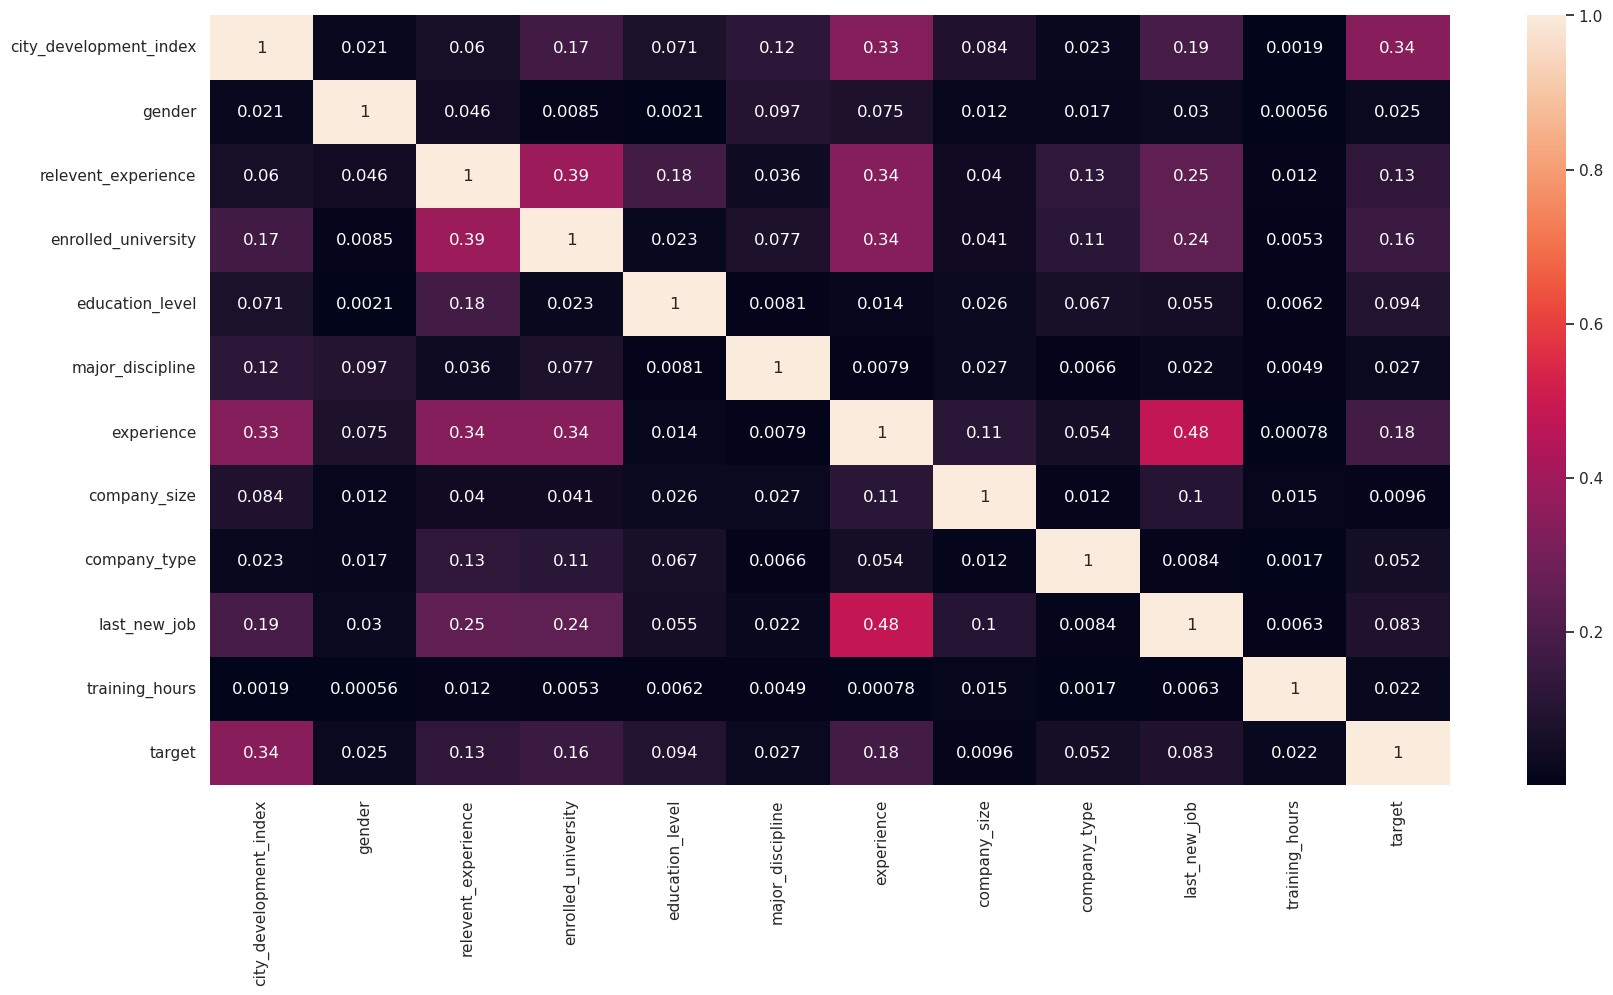

In [25]:
plt.figure(figsize=(20, 10))
correlation_matrix = df.corr().abs()
sns.heatmap(correlation_matrix, annot=True)

In [26]:
sorted_correlations = correlation_matrix['target'].sort_values(ascending=False)
sorted_correlations

target                    1.000000
city_development_index    0.341665
experience                0.176285
enrolled_university       0.155715
relevent_experience       0.128430
education_level           0.094125
last_new_job              0.082607
company_type              0.051878
major_discipline          0.027328
gender                    0.024844
training_hours            0.021577
company_size              0.009603
Name: target, dtype: float64

In [27]:
from reparo import MICE
imputer = MICE()

y = df['target']
X = df.drop('target', axis=1)

imputed_X = X.copy()
imputer.apply(imputed_X, imputed_X.columns)

df = pd.concat([imputed_X, y], axis=1)
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,0.227819,0.214690,0.211406,0.27979,0.261593,21.0,3.452265,0.179448,1.0,36,1.0
1,0.776,0.227819,0.338427,0.211406,0.27979,0.261593,15.0,2.000000,0.180809,5.0,47,0.0
2,0.624,0.231147,0.338427,0.380889,0.27979,0.261593,5.0,2.926058,0.190893,0.0,83,0.0
3,0.789,0.232549,0.338427,0.308730,0.27979,0.262997,0.5,3.063284,0.180809,0.0,52,1.0
4,0.767,0.227819,0.214690,0.211406,0.21440,0.261593,21.0,2.000000,0.139860,4.0,8,0.0


In [28]:
sorted_correlations = correlation_matrix['target'].sort_values(ascending=False)
sorted_correlations

target                    1.000000
city_development_index    0.341665
experience                0.176285
enrolled_university       0.155715
relevent_experience       0.128430
education_level           0.094125
last_new_job              0.082607
company_type              0.051878
major_discipline          0.027328
gender                    0.024844
training_hours            0.021577
company_size              0.009603
Name: target, dtype: float64

# Feature Selection

In [32]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def evaluate(X,y,model):
    cv=RepeatedStratifiedKFold(n_splits=4, n_repeats=1, random_state=1)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    
    return scores

In [35]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from crucio import SMOTEENN
warnings.filterwarnings("ignore")

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier()
scores = []
k_values = range(3, len(X.columns) + 1)

for k in k_values:
    selected_features = SelectKBest(chi2, k=k).fit(X_train, y_train)
    X_train_selected = selected_features.transform(X_train)
    X_test_selected = selected_features.transform(X_test)
    classifier.fit(X_train_selected, y_train)
    
    y_pred = classifier.predict(X_test_selected)
    f1 = f1_score(y_test, y_pred)
    
    f1_scores.append(f1)

plt.plot(k_values, f1_scores)
plt.xlabel('Number of Features (k)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Number of Features')
plt.show()

KeyboardInterrupt: 

In [36]:
enn = SMOTEENN()
df = enn.balance(df,'target')

data=df['target'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(data ,labels=data.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 32:
        ax = plt.subplot(4, 8, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()